In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from configs.paths import (
    DEPLOMA_DIR_PATH,
    DUSHA_CROWD_TRAIN_FILE_PATH,
    RAW_CROWD_TEST_PATH,
)

In [2]:
EXAMPLE_AUDIO_PATH:Path = Path('/home/vkiselev/data/other/univer/deploma/dusha/crowd/crowd_test/wavs/0004eb46b532c20b2f181f1a65d3ff17.wav')
raw_crowd_test = pd.read_csv(RAW_CROWD_TEST_PATH ,sep='\t')
raw_crowd_test.shape

(79088, 9)

In [3]:
raw_crowd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79088 entries, 0 to 79087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hash_id        79088 non-null  object 
 1   audio_path     79088 non-null  object 
 2   duration       79088 non-null  float64
 3   annotator_emo  79088 non-null  object 
 4   golden_emo     6998 non-null   float64
 5   annotator_id   79088 non-null  object 
 6   speaker_text   77833 non-null  object 
 7   speaker_emo    77833 non-null  object 
 8   source_id      77833 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.4+ MB


In [7]:
raw_crowd_test['annotator_emo'].value_counts(dropna=False)


annotator_emo
neutral     48917
sad         17603
angry        5987
positive     5775
other         806
Name: count, dtype: int64

<Axes: ylabel='annotator_emo'>

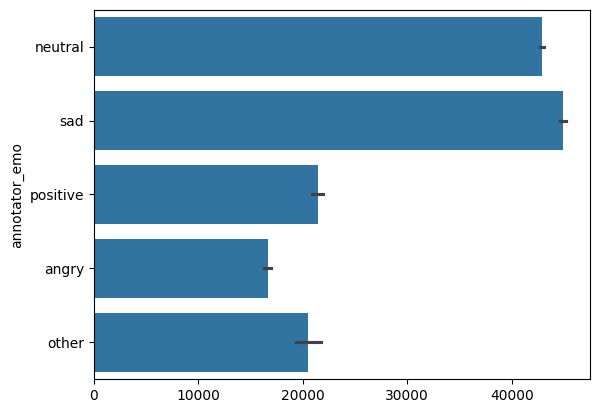

In [8]:
sns.barplot(data=raw_crowd_test['annotator_emo'])

In [9]:
annotator_emo_duration = raw_crowd_test[['annotator_emo', 'duration']].groupby(by='annotator_emo').mean()
annotator_emo_duration

,duration
annotator_emo,
angry,4.713925
neutral,4.659619
other,4.088483
positive,4.603514
sad,4.986755


<BarContainer object of 5 artists>

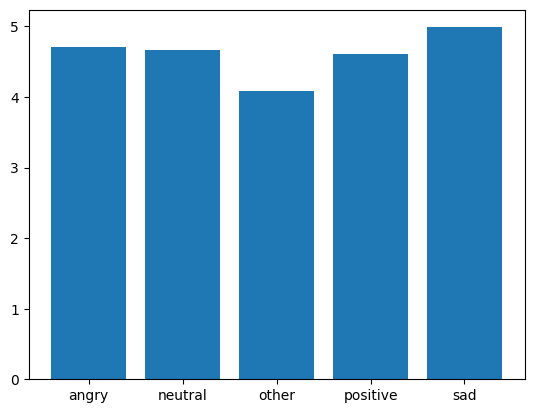

In [10]:
plt.bar(annotator_emo_duration.index, annotator_emo_duration['duration']) 


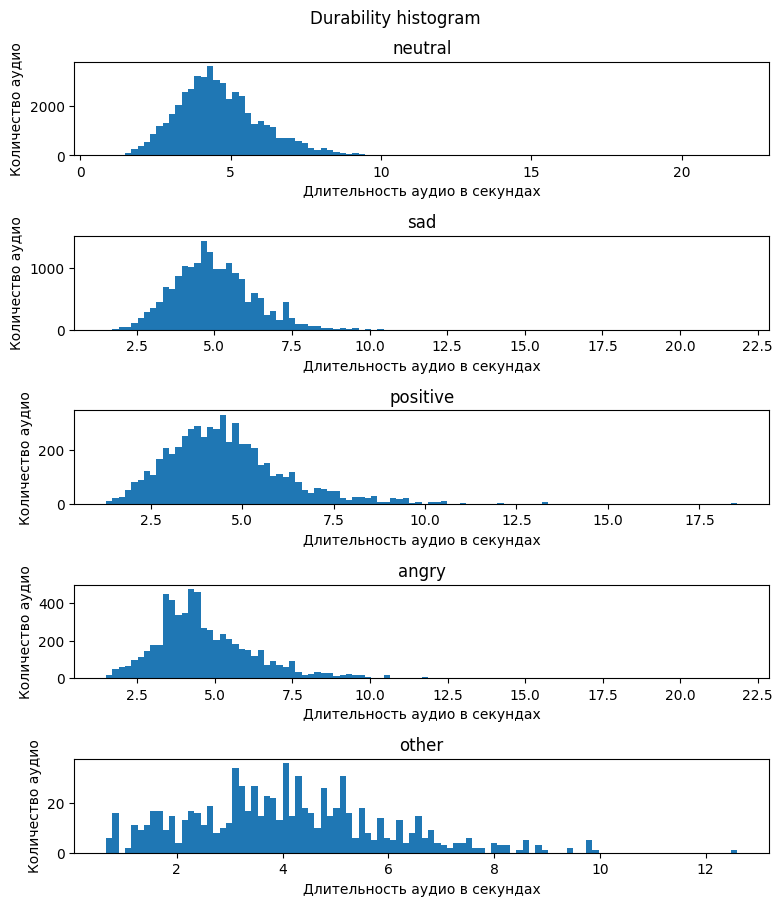

In [12]:
emotions = raw_crowd_test['annotator_emo'].unique()
bins_number = 100
# plt.hist()
fig, axs = plt.subplots(len(emotions), figsize=(8,9))
fig.suptitle('Durability histogram')
fig.tight_layout()
for i in range(len(emotions)):
    fig.tight_layout()
    axs[i].hist(raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[i]]['duration'], bins=bins_number)
    axs[i].set_title(emotions[i])
    axs[i].set_ylabel("Количество аудио")  # Add y-axis label
    axs[i].set_xlabel("Длительность аудио в секундах")  # Add x-axis label
    # axs[i].plot(x, -y)
# plt.hist(raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[1]]['duration'], bins=bins_number)
None

In [7]:
np.NaN is not np.NaN

False

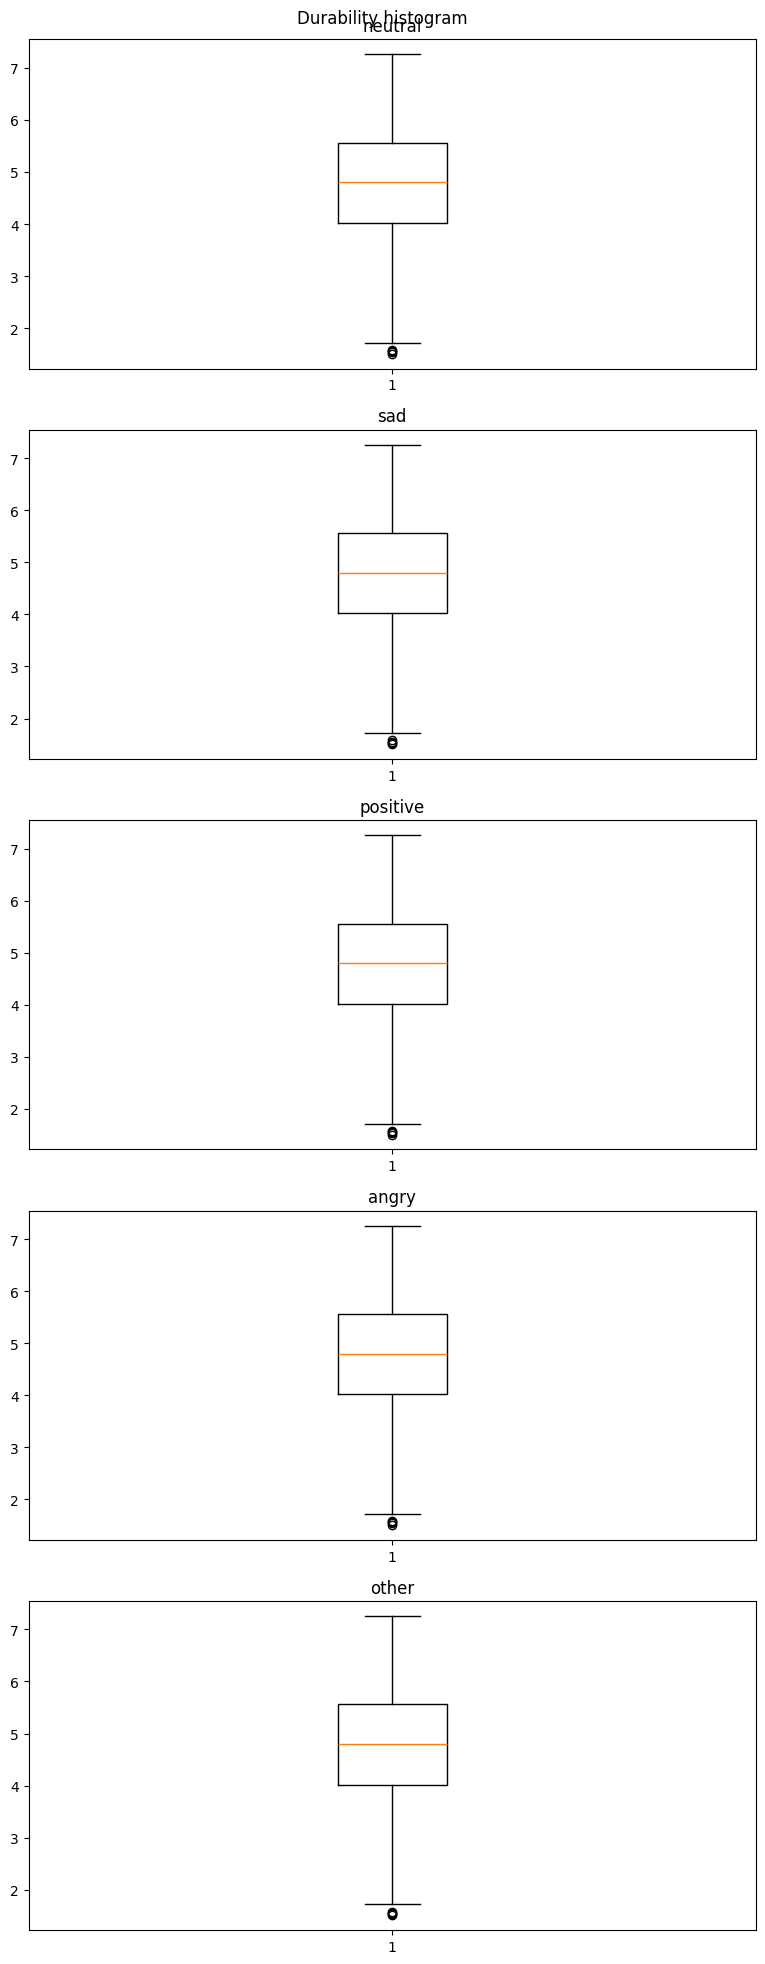

In [8]:
fig, axs = plt.subplots(len(emotions), figsize=(8,20))
fig.suptitle('Durability histogram')
fig.tight_layout()
for i in range(len(emotions)):
    data = raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[1]]['duration']
    q = data.quantile(0.95)
    data = data[data < q]
    fig.tight_layout()
    axs[i].boxplot(data)
    axs[i].set_title(emotions[i])

У аудио с эмоцией грусти нет хвоста (очень мало длинных длинных высказываний), однако грустные аудио в среднем самые длинные
У позитивных аудио самый большой хвост.

In [9]:
# bins_number = 5
# # plt.hist()
# fig, axs = plt.subplots(len(emotions), figsize=(8,9))
# fig.suptitle('Durability histogram')
# fig.tight_layout()
# for i in range(len(emotions)):
#     fig.tight_layout()
#     data = raw_crowd_test[raw_crowd_test['annotator_emo'] == emotions[i]]['speaker_text']
#     data = data[data.notna()]
#     display(data.isna().sum())
#     data.apply(len)
#     axs[i].hist((data), bins=bins_number)
#     axs[i].set_title(emotions[i])